In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
base_dir = "drive/MyDrive/IST707/Project/"
target_dir = base_dir + "ASL_Dataset"

dF_file = "procesed_data_w_imgdata.csv"
dataset_path = base_dir + dF_file

In [ ]:
df = pd.read_csv(base_dir + "procesed_imgdata_32x32.csv")

<ipython-input-6-c9cf85d25ea8>:1: DtypeWarning: Columns (1024) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base_dir + "procesed_imgdata_32x32.csv")


In [ ]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,labels,isSign,labelsEnc
0,0.478431,0.435294,0.462745,0.537255,0.631373,0.670588,0.654902,0.639216,0.619608,0.592157,...,0.419608,0.400000,0.407843,0.403922,0.403922,0.400000,0.392157,u,1,33
1,0.474510,0.439216,0.447059,0.533333,0.627451,0.670588,0.654902,0.639216,0.627451,0.596078,...,0.407843,0.415686,0.415686,0.411765,0.403922,0.403922,0.407843,u,1,33
2,0.474510,0.427451,0.396078,0.356863,0.321569,0.290196,0.262745,0.247059,0.231373,0.215686,...,0.211765,0.180392,0.172549,0.168627,0.156863,0.274510,0.568627,u,1,33
3,0.466667,0.411765,0.384314,0.341176,0.298039,0.203922,0.152941,0.231373,0.223529,0.203922,...,0.568627,0.576471,0.576471,0.576471,0.572549,0.580392,0.588235,u,1,33
4,0.454902,0.407843,0.388235,0.341176,0.309804,0.282353,0.254902,0.243137,0.219608,0.207843,...,0.537255,0.552941,0.556863,0.549020,0.545098,0.549020,0.556863,u,1,33


In [ ]:
X = df.iloc[:, :-3].copy()
y = df["labelsEnc"]

In [ ]:
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0.478431,0.435294,0.462745,0.537255,0.631373,0.670588,0.654902,0.639216,0.619608,0.592157,...,0.439216,0.392157,0.435294,0.419608,0.400000,0.407843,0.403922,0.403922,0.400000,0.392157
1,0.474510,0.439216,0.447059,0.533333,0.627451,0.670588,0.654902,0.639216,0.627451,0.596078,...,0.411765,0.415686,0.411765,0.407843,0.415686,0.415686,0.411765,0.403922,0.403922,0.407843
2,0.474510,0.427451,0.396078,0.356863,0.321569,0.290196,0.262745,0.247059,0.231373,0.215686,...,0.529412,0.282353,0.227451,0.211765,0.180392,0.172549,0.168627,0.156863,0.274510,0.568627
3,0.466667,0.411765,0.384314,0.341176,0.298039,0.203922,0.152941,0.231373,0.223529,0.203922,...,0.537255,0.541176,0.556863,0.568627,0.576471,0.576471,0.576471,0.572549,0.580392,0.588235
4,0.454902,0.407843,0.388235,0.341176,0.309804,0.282353,0.254902,0.243137,0.219608,0.207843,...,0.133333,0.168627,0.525490,0.537255,0.552941,0.556863,0.549020,0.545098,0.549020,0.556863


In [ ]:
X = np.reshape(X.values, (-1, 32, 32, 1))

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(39, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 128)        5

In [ ]:
epochs = 10
history = model.fit(train_data, train_labels, batch_size=32, epochs=epochs, validation_data=(val_data, val_labels))

Epoch 1/10
1225/1225 [==============================] - 73s 59ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.0664 - val_accuracy: 0.9809
Epoch 2/10
1225/1225 [==============================] - 73s 60ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 0.0316 - val_accuracy: 0.9928
Epoch 3/10
1225/1225 [==============================] - 73s 59ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.0372 - val_accuracy: 0.9914
Epoch 4/10
1225/1225 [==============================] - 73s 60ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0394 - val_accuracy: 0.9905
Epoch 5/10
1225/1225 [==============================] - 74s 61ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.0393 - val_accuracy: 0.9904
Epoch 6/10
1225/1225 [==============================] - 78s 64ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.0452 - val_accuracy: 0.9894
Epoch 7/10
1225/1225 [==============================] - 74s 60ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0465 -

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

383/383 [==============================] - 7s 18ms/step - loss: 0.0642 - accuracy: 0.9857
Test accuracy: 0.9857096076011658


In [ ]:
model.save(base_dir + 'Models/cnn_3conv_e20_v2.h5')

In [ ]:
first = False # First training values
if first:
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
else:
  acc = acc + history.history['accuracy']
  val_acc = val_acc + history.history['val_accuracy']
  loss = loss + history.history['loss']
  val_loss = val_loss + history.history['val_loss']

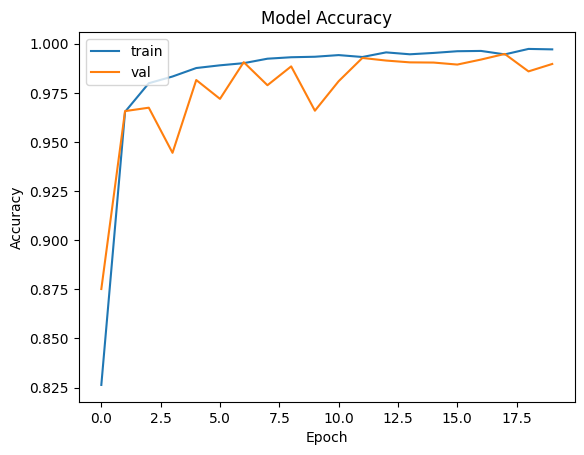

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

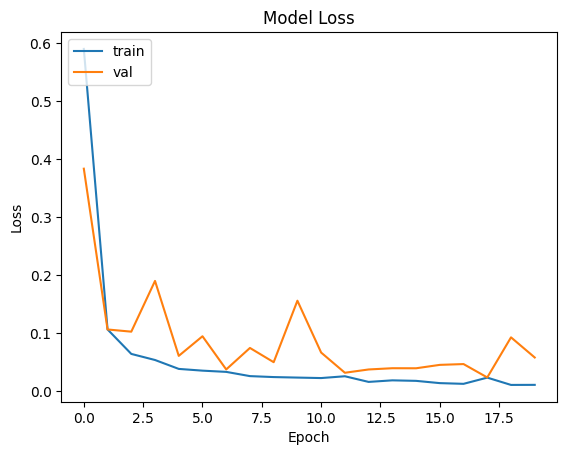

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_data)

383/383 [==============================] - 8s 20ms/step


In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
print('Predicted labels:', y_pred[:10])

Predicted labels: [ 2 18 10  0 34 26 16  6  5 35]


In [ ]:
cm = tf.math.confusion_matrix(test_labels, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 tf.Tensor(
[[309   0   0 ...   0   0   0]
 [  0 302   0 ...   1   0   0]
 [  0   0 314 ...   0   0   1]
 ...
 [  0   0   0 ... 301   0   0]
 [  0   0   0 ...   0 283   0]
 [  0   0   0 ...   0   0 318]], shape=(39, 39), dtype=int32)


TypeError: ignored

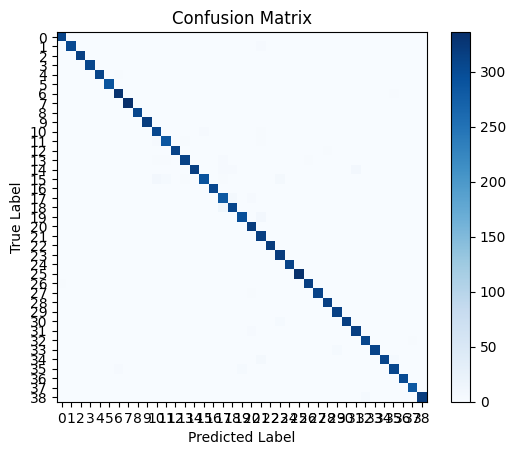

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(39))
plt.yticks(np.arange(39))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(39):
    for j in range(39):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(test_labels, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       310
           1       1.00      0.99      0.99       306
           2       1.00      1.00      1.00       315
           3       1.00      1.00      1.00       306
           4       1.00      0.99      1.00       311
           5       1.00      1.00      1.00       290
           6       0.99      0.99      0.99       334
           7       1.00      1.00      1.00       336
           8       1.00      1.00      1.00       307
           9       1.00      1.00      1.00       318
          10       0.95      0.98      0.97       311
          11       0.97      0.97      0.97       296
          12       1.00      0.97      0.99       319
          13       0.99      0.96      0.97       324
          14       1.00      0.95      0.97       333
          15       0.98      0.92      0.95       316
          16       1.00      0.99      0.99       308
   

In [ ]:
import json
with open(base_dir + 'index_labels.json', 'r') as f:
    data_dict = json.load(f)

In [ ]:
data_dict

{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 '10': 'a',
 '11': 'b',
 '12': 'c',
 '13': 'd',
 '14': 'del',
 '15': 'e',
 '16': 'f',
 '17': 'g',
 '18': 'h',
 '19': 'i',
 '20': 'j',
 '21': 'k',
 '22': 'l',
 '23': 'm',
 '24': 'n',
 '25': 'nothing',
 '26': 'o',
 '27': 'p',
 '28': 'q',
 '29': 'r',
 '30': 's',
 '31': 'space',
 '32': 't',
 '33': 'u',
 '34': 'v',
 '35': 'w',
 '36': 'x',
 '37': 'y',
 '38': 'z'}

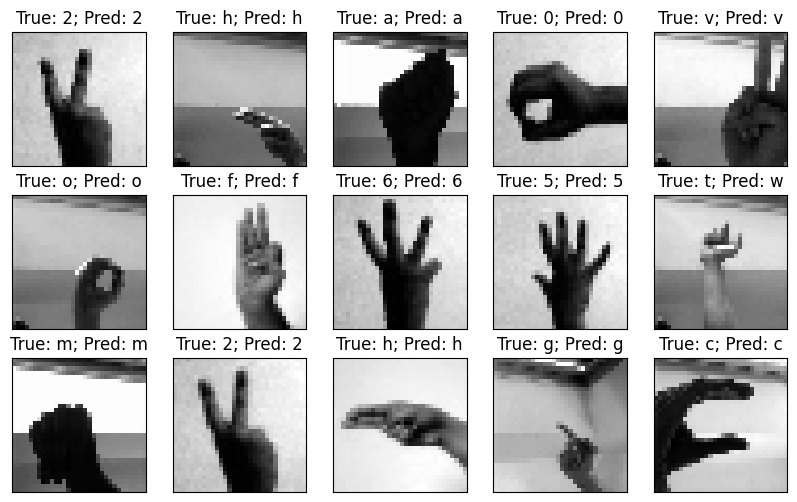

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
true = list(test_labels)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i, :, :, 0], cmap='gray')
    ax.set_title(f'True: {data_dict[str(true[i])]}; Pred: {data_dict[str(np.argmax(predictions[i]))]}')
# plt.show()


In [ ]:
data_dict[str(np.argmax(predictions[i]))]

'c'